### Q3. This problem involves the Boston data set, which we saw in the lab for this chapter. We will now try to predict per capita crime rate using the other variables in this data set. In other words, per capita crime rate is the response, and the other variables are the predictors.

In [1]:
from ISLP import load_data
df = load_data('Boston')
df.columns
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,6.48,22.0


#### (a) For each predictor, fit a simple linear regression model to predict the response. Describe your results. In which of the models is there a statistically significant association between the predictor and the response? Create some plots to back up your assertions.

#### ***Ans:*** In the following models, there is a statistically significant association. ['rad', 'tax', 'lstat', 'nox', 'indus', 'medv', 'dis', 'age', 'ptratio', 'rm', 'zn']. According to R-squared, rad, and tax may be better predictors.


=== Simple Linear Regression Results ===
   Predictor     Coef      R²  p-value
7        rad   0.6179  0.3913   0.0000
8        tax   0.0297  0.3396   0.0000
10     lstat   0.5488  0.2076   0.0000
3        nox  31.2485  0.1772   0.0000
1      indus   0.5098  0.1653   0.0000
11      medv  -0.3632  0.1508   0.0000
6        dis  -1.5509  0.1441   0.0000
5        age   0.1078  0.1244   0.0000
9    ptratio   1.1520  0.0841   0.0000
4         rm  -2.6841  0.0481   0.0000
0         zn  -0.0739  0.0402   0.0000
2       chas  -1.8928  0.0031   0.2094

Significant predictors (p < 0.05): ['rad', 'tax', 'lstat', 'nox', 'indus', 'medv', 'dis', 'age', 'ptratio', 'rm', 'zn']


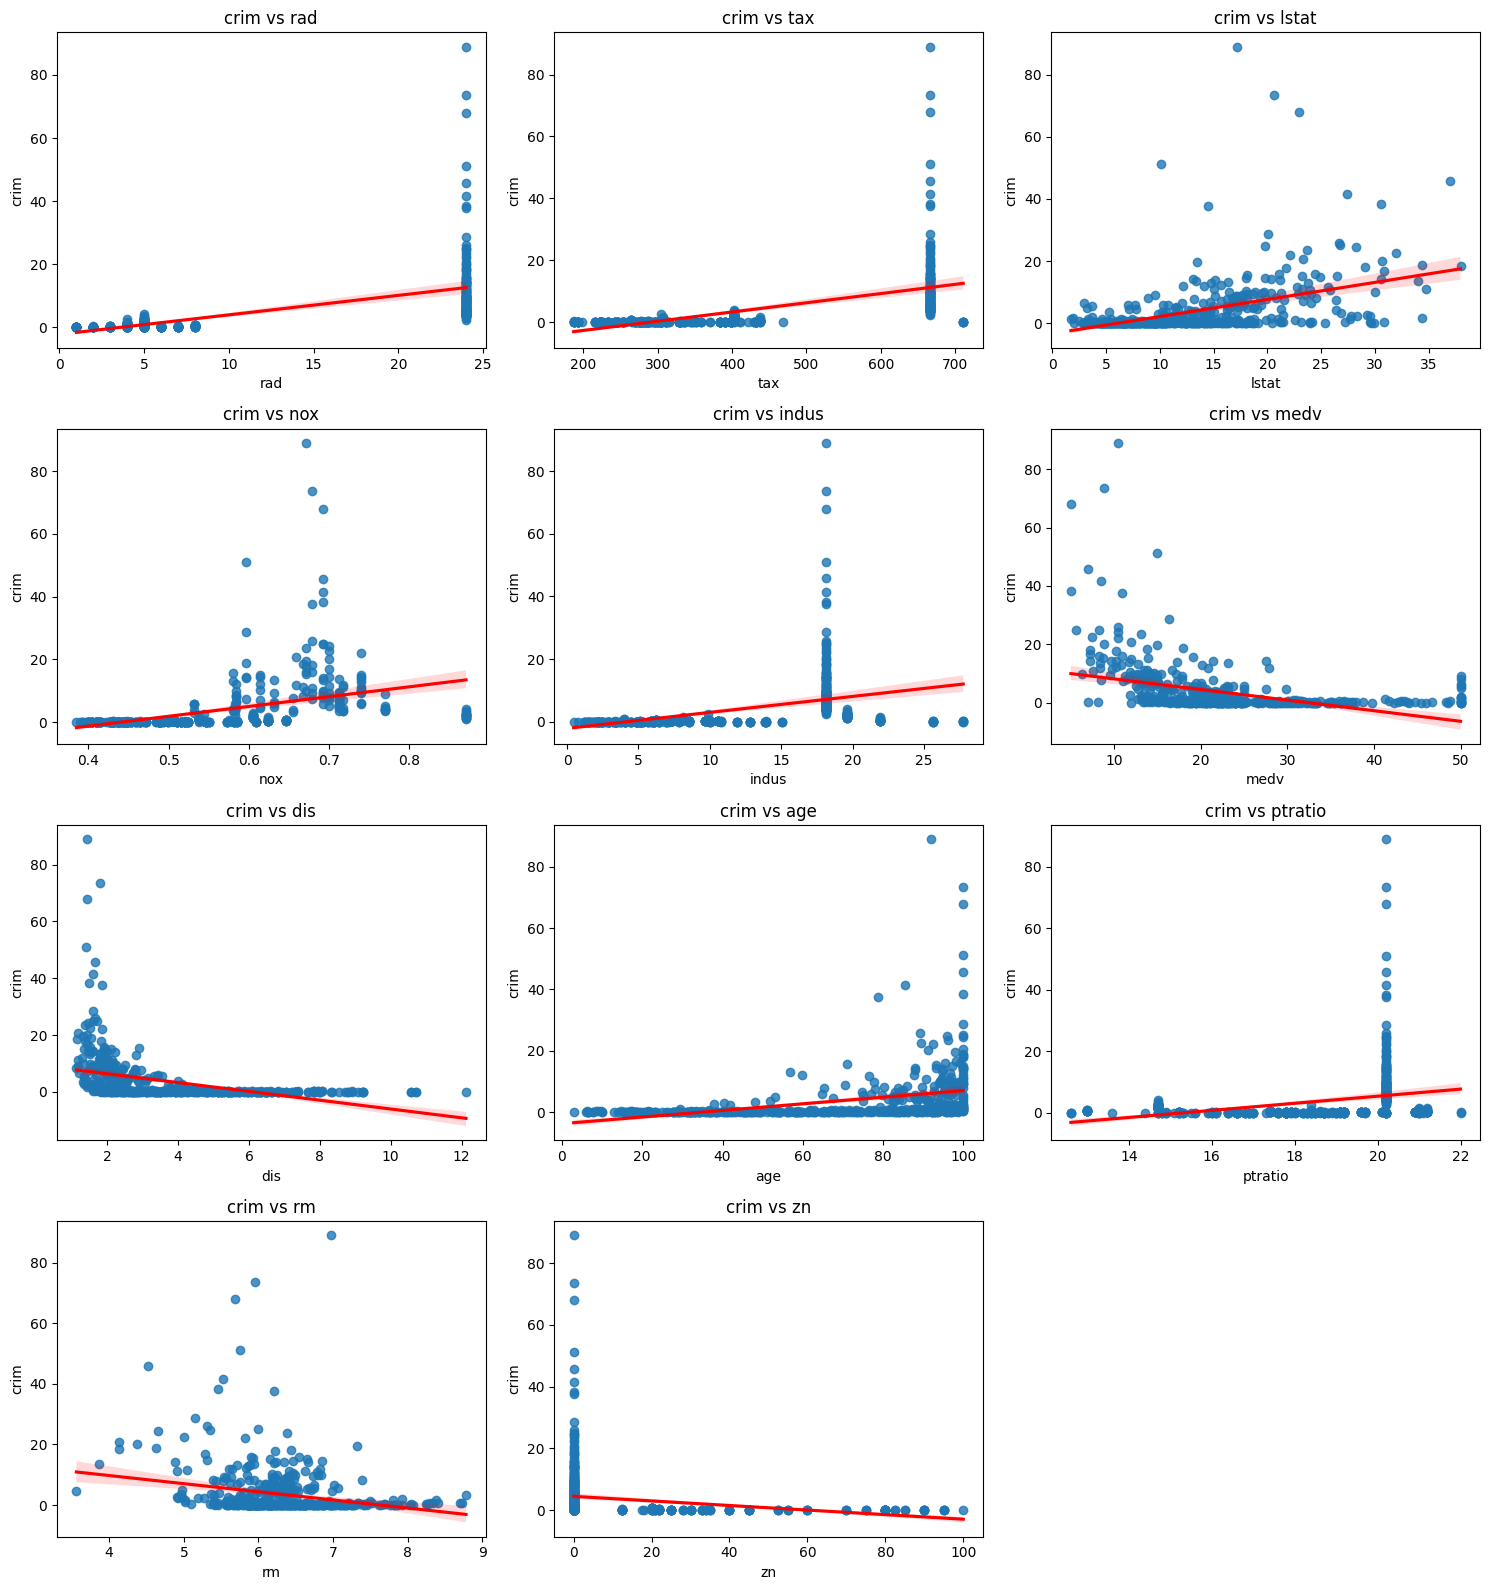

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ISLP import load_data
import statsmodels.api as sm

response = "crim"
predictors = [col for col in df.columns if col != response]

results = []

for col in predictors:
    X = sm.add_constant(df[col])  # intercept term
    y = df[response]
    model = sm.OLS(y, X).fit()
    
    p_value = model.pvalues[col]
    r2 = model.rsquared
    coef = model.params[col]
    
    results.append({
        "Predictor": col,
        "Coef": coef,
        "R²": r2,
        "p-value": p_value
    })

df_results = pd.DataFrame(results).sort_values("p-value")
print("\n=== Simple Linear Regression Results ===")
print(df_results.round(4))


sig_vars = df_results[df_results["p-value"] < 0.05]["Predictor"].tolist()
print(f"\nSignificant predictors (p < 0.05): {sig_vars}")

# === 繪圖檢查關係 ===
n = len(sig_vars)
cols = 3
rows = (n + cols - 1) // cols
fig, axes = plt.subplots(rows, cols, figsize=(15, 4*rows))
axes = axes.flatten()

for i, var in enumerate(sig_vars):
    sns.regplot(x=df[var], y=df[response], line_kws={"color": "red"}, ax=axes[i])
    axes[i].set_title(f"{response} vs {var}")

# 若圖數不足格數，清空多餘子圖
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

#### (b) Fit a multiple regression model to predict the response using all of the predictors. Describe your results. For which predictors can we reject the null hypothesis H0 : βj = 0?

#### ***Ans:*** Variables in the list['zn', 'dis', 'rad', 'medv'] have a significant coefficient.

In [4]:
import statsmodels.api as sm

y = df["crim"]
X = sm.add_constant(df.drop(columns="crim"))  # 所有 predictor + 截距

model_full = sm.OLS(y, X).fit()

print(model_full.summary())

sig_predictors = model_full.pvalues[model_full.pvalues < 0.05].index.tolist()
sig_predictors.remove("const") if "const" in sig_predictors else None

print(f"\nSignificant predictors (p < 0.05): {sig_predictors}")


                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.449
Model:                            OLS   Adj. R-squared:                  0.436
Method:                 Least Squares   F-statistic:                     33.52
Date:                Sun, 19 Oct 2025   Prob (F-statistic):           2.03e-56
Time:                        21:17:07   Log-Likelihood:                -1655.4
No. Observations:                 506   AIC:                             3337.
Df Residuals:                     493   BIC:                             3392.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.7784      7.082      1.946      0.0

#### (c) How do your results from (a) compare to your results from (b)? Create a plot displaying the univariate regression coefficients from (a) on the x-axis, and the multiple regression coefficients from (b) on the y-axis. That is, each predictor is displayed as a single point in the plot. Its coefficient in a simple linear regression model is shown on the x-axis, and its coefficient estimate in the multiple linear regression model is shown on the y-axis.

#### ***Ans:*** A little bit different, initially I thought "tax" could be a good predictor, but in Question (c) we could find that its coefficient is not significant.

         Simple_Regression  Multiple_Regression
zn               -0.073935             0.045710
indus             0.509776            -0.058350
chas             -1.892777            -0.825378
nox              31.248531            -9.957587
rm               -2.684051             0.628911
age               0.107786            -0.000848
dis              -1.550902            -1.012247
rad               0.617911             0.612465
tax               0.029742            -0.003776
ptratio           1.151983            -0.304073
lstat             0.548805             0.138801
medv             -0.363160            -0.220056


/var/folders/yb/xnfk9z6x34527z3924bcjqcr0000gn/T/ipykernel_3862/1961220679.py:34: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(coef_df["Simple_Regression"][i] + 0.02,
/var/folders/yb/xnfk9z6x34527z3924bcjqcr0000gn/T/ipykernel_3862/1961220679.py:35: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  coef_df["Multiple_Regression"][i],


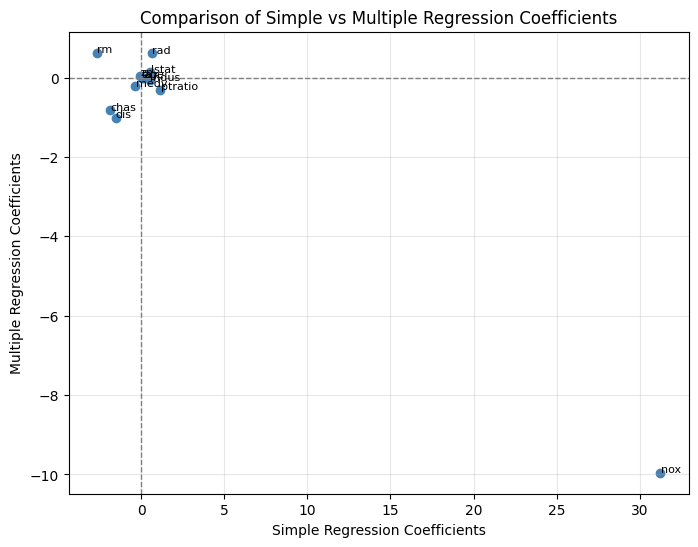

In [5]:
# === (a) Re-run simple linear regressions to get each β̂_j ===
uni_coefs = {}
for col in df.columns:
    if col == "crim":
        continue
    X_uni = sm.add_constant(df[[col]])
    model_uni = sm.OLS(df["crim"], X_uni).fit()
    uni_coefs[col] = model_uni.params[col]

# === (b) Multiple regression coefficients from the full model ===
y = df["crim"]
X = sm.add_constant(df.drop(columns="crim"))
multi_model = sm.OLS(y, X).fit()
multi_coefs = multi_model.params.drop("const")

# === (c) Combine both for comparison ===
coef_df = pd.DataFrame({
    "Simple_Regression": pd.Series(uni_coefs),
    "Multiple_Regression": multi_coefs
})
print(coef_df)

# === (d) Create the comparison plot ===
plt.figure(figsize=(8, 6))
plt.scatter(coef_df["Simple_Regression"], coef_df["Multiple_Regression"], color="steelblue")
plt.axhline(0, color="gray", linestyle="--", linewidth=1)
plt.axvline(0, color="gray", linestyle="--", linewidth=1)
plt.xlabel("Simple Regression Coefficients")
plt.ylabel("Multiple Regression Coefficients")
plt.title("Comparison of Simple vs Multiple Regression Coefficients")

# Annotate each point with the variable name
for i, var in enumerate(coef_df.index):
    plt.text(coef_df["Simple_Regression"][i] + 0.02,
             coef_df["Multiple_Regression"][i],
             var, fontsize=8)

plt.grid(alpha=0.3)
plt.show()


#### (d)Is there evidence of non-linear association between any of the predictors and the response? To answer this question, for each predictor X, fit a model of the form

#### ***Ans:*** According to the sctter-plot below, I find that there might exist 3-degree polynomial relationship between "lstat"(X) and "rm"(Y) variables. 
#### Cubic Polynomial Coefficients

| Coefficient | Value |
|:----:|------:|
| a | -0.00032880196172680836 |
| b | 0.018965409323502394 |
| c | -0.36604198845978203 |
| d | 8.32377521784825 |

#### Model：

$$
\hat{y} = -0.0003288x^3 + 0.01897x^2 - 0.3660x + 8.3238
$$




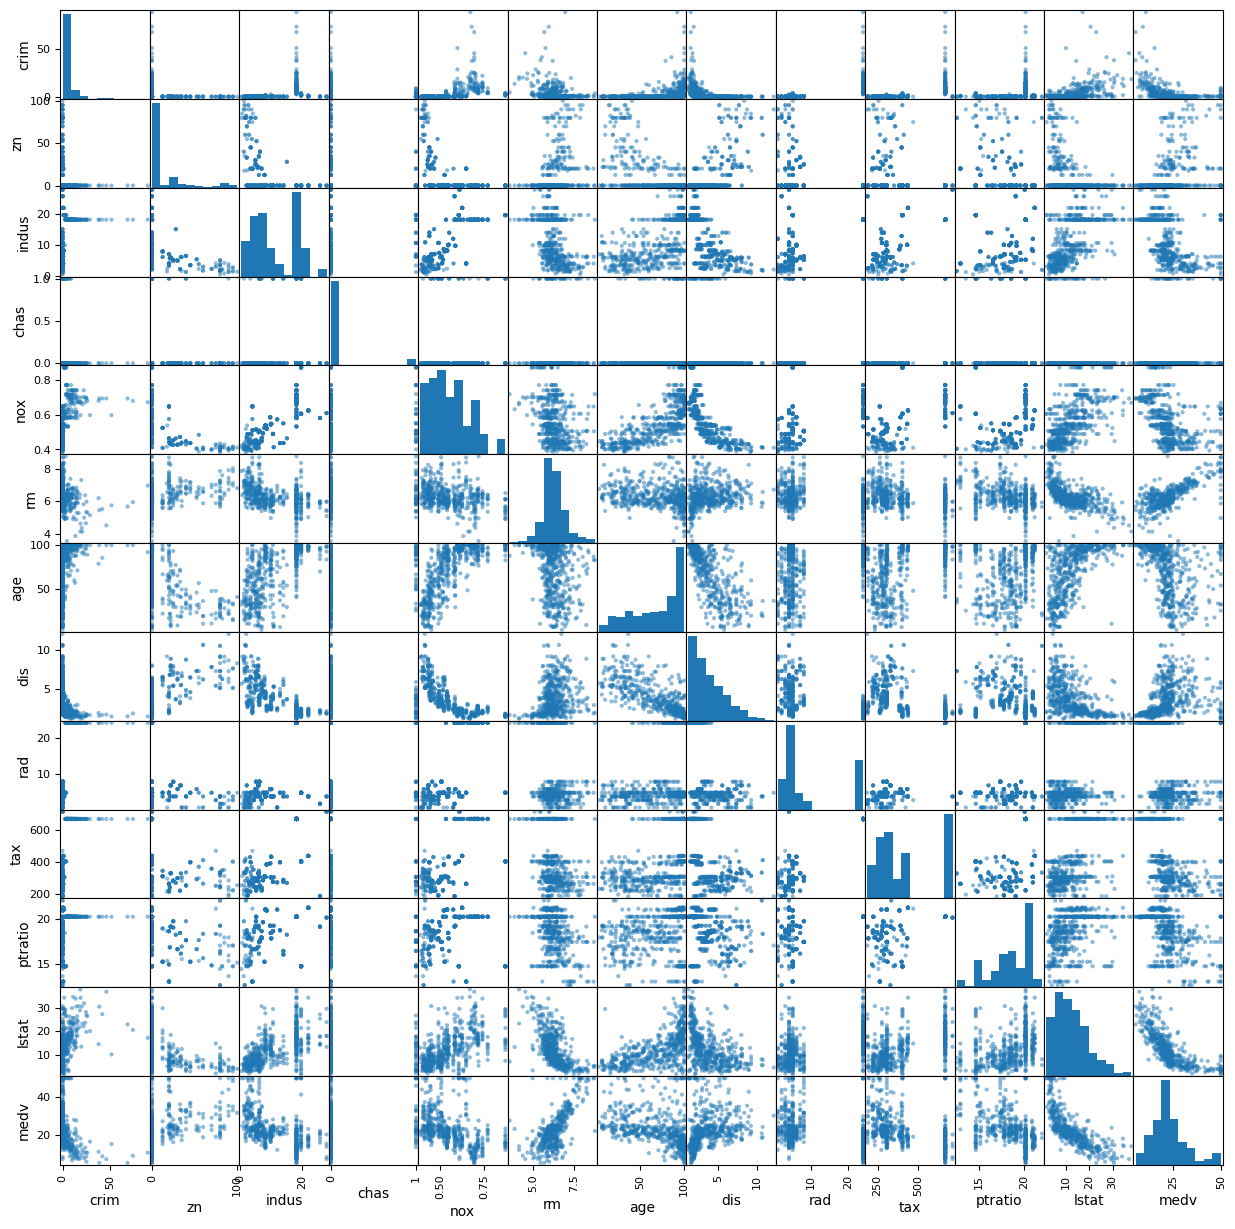

In [11]:
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

cols = df.columns.tolist()

scatter_matrix(df[cols], diagonal="hist")
plt.gcf().set_size_inches(15, 15)
plt.show()

import numpy as np

In [10]:
import numpy as np
x=df["lstat"]
y=df["rm"]
coefficients = np.polyfit(x, y, 3)

a, b, c, d = coefficients
print(f"a: {a}, b: {b}, c: {c}, d: {d}")



a: -0.00032880196172680836, b: 0.018965409323502394, c: -0.36604198845978203, d: 8.32377521784825


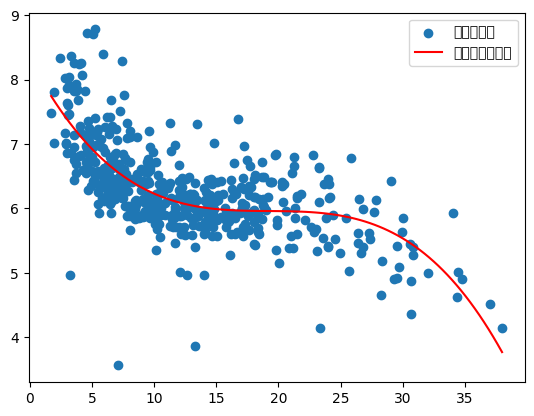

In [9]:
# 建立一個新的 x 值序列用於繪製平滑曲線
x_smooth = np.linspace(x.min(), x.max(), 100)
# 使用 numpy.poly1d 建立多項式函式
p = np.poly1d(coefficients)
y_smooth = p(x_smooth)

import matplotlib.pyplot as plt
plt.scatter(x, y, label='原始數據點')
plt.plot(x_smooth, y_smooth, color='red', label='三次多項式擬合')
plt.legend()
plt.show()